# Sistema binario: Energía y Momentum angular radiado

In [1]:
from sympy import *
init_printing(use_unicode=True)

Primero definimos los símbolos de las variables a usar: $a,e,\mu,L,\omega_0,\varphi$ y $\varphi_0$:

In [2]:
a = Symbol('a', positive=True)
e = Symbol('e', positive=True)
mu = Symbol('mu', positive=True)
L = Symbol('L',positive=True)
omega0 = Symbol('omega0',positive=True)
phi = Symbol('varphi',positive=True)
phi0 = Symbol('varphi0',real=True)

# Momento de inercia: $M_{ij}$

Y ahora definimos los símbolos de las componentes (no nulas) del momento cuadrupolar $M_{ij}$, como funciones de $\varphi$

In [3]:
M11 = Function('M11')(phi)
M12 = Function('M12')(phi)
M22 = Function('M22')(phi)
r = Function('r')(phi)

Ahora ingresamos la forma de la órbita Kepleriana, en términos de $a, e, \varphi$ y $\varphi_0$:

In [4]:
r = a*(1-e**2)/(1+e*cos(phi-phi0))

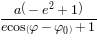

In [5]:
r

Ahora sustituimos los valores de las componentes del momento cuadrupolar en función de las coordenadas del sistema reducido:

In [6]:
M11 = mu*(r**2)*cos(phi)**2
M12 = mu*(r**2)*sin(phi)*cos(phi)
M22 = mu*(r**2)*sin(phi)**2

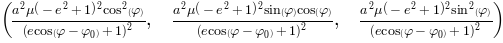

In [7]:
M11,M12,M22

# Calculo de la derivada ${d M_{ij}}/{d\varphi}$

Calculamos las derivadas de las componentes de $M_{ij}$ respecto a $\varphi$, usando la función `diff` de Sympy

In [8]:
dM11_phi = simplify(diff(M11,phi))
dM12_phi = simplify(diff(M12,phi))
dM22_phi = simplify(diff(M22,phi))

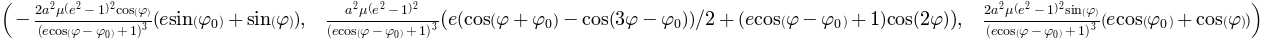

In [9]:
dM11_phi,dM12_phi,dM22_phi

# Calculo de las derivadas $\dot{M}_{ij}$, $\ddot{M}_{ij}$ y $\dddot{M}_{ij}$

Ahora calculamos las derivadas respecto al tiempo, usando la regla de la cadena, es decir,
$$\frac{dM_{ij}}{dt}=\frac{dM_{ij}}{d\varphi}\frac{d\varphi}{dt},$$
donde luego sustituiremos
$$\frac{d \varphi}{d t}=\frac{L}{\mu r^2},$$
con 
$$L=\omega_0\mu a^2\sqrt{1-e^2}$$

In [10]:
L = omega0*mu*(a**2)*sqrt(1-e**2)
dphi_t = L/(mu*r**2)

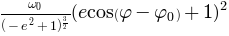

In [11]:
dphi_t

In [12]:
dM11_t = simplify(dM11_phi*dphi_t)
dM12_t = simplify(dM12_phi*dphi_t)
dM22_t = simplify(dM22_phi*dphi_t)

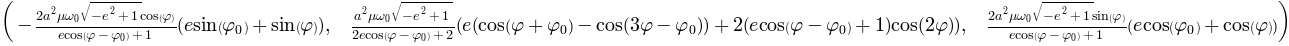

In [13]:
dM11_t,dM12_t,dM22_t

Repetimos el procedimiento, para calcular las segundas derivadas:

In [14]:
dM11_tt = simplify(diff(dM11_t,phi)*dphi_t)
dM12_tt = simplify(diff(dM12_t,phi)*dphi_t)
dM22_tt = simplify(diff(dM22_t,phi)*dphi_t)

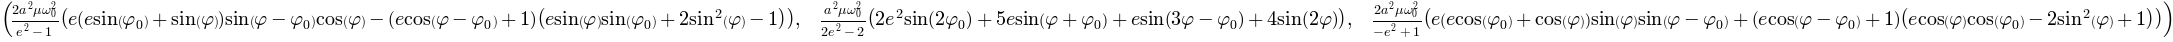

In [15]:
dM11_tt,dM12_tt,dM22_tt

Finalmente, hacemos lo mismo, para calcular la tercera derivada temporal:

In [16]:
dM11_ttt = simplify(diff(dM11_tt,phi)*dphi_t)
dM12_ttt = simplify(diff(dM12_tt,phi)*dphi_t)
dM22_ttt = simplify(diff(dM22_tt,phi)*dphi_t)

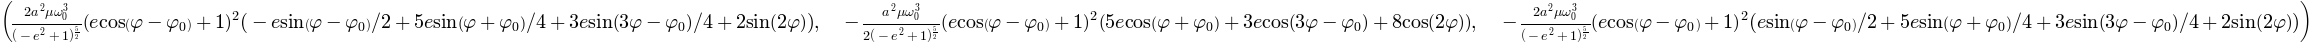

In [17]:
dM11_ttt,dM12_ttt,dM22_ttt

# Potencia promedio radiada

A continuación, calcularemos la potencia promedio radiada, evaluando la expresión
$$
\left\langle P\right\rangle=\frac{G}{5 c^5} \left\langle\dddot{Q}{}^{ij}\dddot{Q}{}^{ij}\right\rangle
$$
que, en nuestro caso de movimiento en el plano $xy$, se reduce a
$$\left\langle P\right\rangle=\frac{2G}{15c^5}\, \left\langle \left(\dddot{M}_{11}\right)^2+ \left(\dddot{M}_{22}\right)^2+3\left(\dddot{M}_{12}\right)^2 -\dddot{M}_{11}\dddot{M}_{22}\right\rangle .
$$

Primero, definiremos los símbolos de $G, c$ y $P$:

In [18]:
G = Symbol('G')
c = Symbol('c')
P = Symbol('P')

Y reemplazamos los valores de las derivadas del momento cuadrupolar en la expresión para la potencia (aún sin promediar!):

In [19]:
P = simplify(((2*G)/(15*c**5))*(dM11_ttt**2 + dM22_ttt**2 + 3*dM12_ttt**2 - dM11_ttt*dM22_ttt))

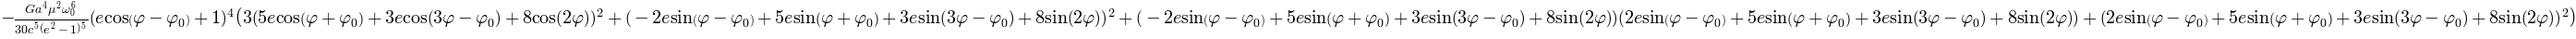

In [20]:
P

Nuevamente, usando la regla de la cadena, podemos reescribir el promedio requerido en términos de una integral sobre el ángulo $\varphi$:
\begin{align}
\left\langle P(t)\right\rangle &= \frac{1}{T}\int_0^T P(t)\,dt \\
&= \frac{1}{T}\int_0^{2\pi} P(\varphi)\frac{dt}{d\varphi}\,d\varphi \\
&= \frac{1}{T}\frac{\mu}{L}\int_0^{2\pi} r^2(\varphi)P(\varphi)\,d\varphi \\
&= \frac{\mu a^2(1-e^2)^2}{TL}\int_0^{2\pi} \frac{P(\varphi)}{\left[1+e\cos(\varphi-\varphi_0)\right]^2}\,d\varphi \\
&= \frac{(1-e^2)^{3/2}}{2\pi}\int_0^{2\pi} \frac{P(\varphi)}{\left[1+e\cos(\varphi-\varphi_0)\right]^2}\,d\varphi.
\end{align}

In [21]:
integrando = factor(simplify(((1-e**2)**(3/2))/(2*pi))*(P/(1+e*cos(phi-phi0))**2))

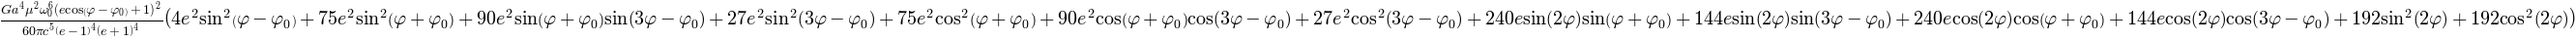

In [22]:
integrando

In [23]:
promedio_P = Symbol('PP')

In [24]:
import time

In [25]:
# tomamos el tiempo de este cálculo, porque es el que más tarda (~ 2 horas!)
st = time.time()
promedio_P =integrate(integrando,(phi,0,2*pi))
ft = time.time()
print(ft-st)

6605.178473


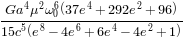

In [26]:
simplify(promedio_P)

# Como en el apunte:

$$
g(\varphi) := 2 [1 + e \cos(\varphi − \varphi_{0} )]^4 [ 24 + 13e^2 + 48e \cos(\varphi − \varphi_{0} ) + 11e^2 \cos(2\varphi − 2\varphi_{0} )]
$$

$$
\left\langle g(\varphi)\right\rangle =\frac{(1 − e^2 )^{3/2}}{2\pi}\int_{0}^{2\pi} \frac{g(\varphi)}{[1 + e cos(\varphi − \varphi_{0})]^2} d\varphi
$$

In [27]:
M = Symbol('M')
x = Symbol('x')
x0 = Symbol('x0')
g = Function('g')(x)
promedio_g = Symbol('Pg')

In [28]:
g = 2*((1 + e*cos(phi-phi0))**4)*(24 + 13*e**2 + 48*e*cos(phi-phi0) + 11*e**2*cos(2*phi-2*phi0))

In [29]:
g

$$
\left\langle P\right\rangle=\frac{2 G^4 \mu^2 M^3}{15 c^5 a^5 (1 − e^2 )^5} \left\langle g(\varphi)\right\rangle
$$

In [30]:
promedio_g = simplify(((1-e**2)**(3/2))/(2*pi))*integrate(g/(1+e*cos(phi-phi0))**2,(phi,0,2*pi))

In [31]:
trigsimp(promedio_g)

# Momentum angular radiado

Similarmente, para calcular el momento angular radiado usamos
$$
\left\langle\dot{L}{}^{i}\right\rangle=\frac{2 G}{5 c^5} \epsilon^{ijk}\left\langle\ddot{M}{}^{ja}\ddot{M}{}^{ka}\right\rangle .
$$

En nuestro caso, de movimiento en el plano $xy$, encontramos:
\begin{align}
\left\langle\dot{L}{}^{3}\right\rangle &= \frac{2 G}{5 c^5} \left\langle\epsilon^{31k}\ddot{M}{}^{1l}\dddot{M}{}^{kl}+\epsilon^{32k}\ddot{M}{}^{2l}\dddot{M}{}^{kl}\right\rangle\\
&= \frac{2 G}{5 c^5} \left\langle\epsilon^{312}\ddot{M}{}^{1l}\dddot{M}{}^{2l}+\epsilon^{321}\ddot{M}{}^{2l}\dddot{M}{}^{1l}\right\rangle \\
 &= \frac{2 G}{5 c^5} \left\langle\ddot{M}{}^{11}\dddot{M}{}^{21}+\ddot{M}{}^{12}\dddot{M}{}^{22}-\ddot{M}{}^{21}\dddot{M}{}^{11}-\ddot{M}{}^{22}\dddot{M}{}^{12}\right\rangle \\
&=\frac{4 G}{5 c^5} \left\langle\ddot{M}{}^{12}(\dddot{M}{}^{22}-\dddot{M}{}^{11})\right\rangle .
\end{align}

In [32]:
L_t = simplify(((4*G)/(5*c**5))*(dM12_tt*(dM22_ttt-dM11_ttt)))

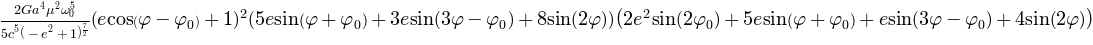

In [33]:
L_t

El promedio se calcula de forma similar a como se hizo con la potencia, realizando un cambio de variable para finalmente integrar sobre el ángulo $\varphi$

In [34]:
integrando = (1-e**2)**(3/2)/(2*pi)*L_t/(1+e*cos(phi-phi0))**2

In [35]:
promedio_L_t = trigsimp(integrate(integrando,(phi,0,2*pi)))

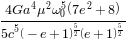

In [36]:
promedio_L_t